In [1]:
from imageio import imread
import os
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd

In [2]:
def load_and_flatten_image(imagePath, width, height):
    image = imread(imagePath)
    #small_image = resize(image, (11, 20))
    image_single_channel = image[:,:,0]
    small_image = cv2.resize(image_single_channel, (width, height))
    image_array = small_image.flatten()
    return image_array

In [3]:
path = "classificatie"
width = 20
height = 11
cpt = sum([len(files) for r, d, files in os.walk(path)])
data_array = np.empty([cpt, height*width], dtype=np.uint8)
label_array = np.empty([cpt], dtype=np.str_)
counter = 0
for root, dirs, files in os.walk(path):
    for dirname in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(path, dirname)):
            for filename in files2:
                image = load_and_flatten_image(os.path.join(os.path.join(path, dirname), filename), width, height)
                for key, pixel in enumerate(image):
                    data_array[counter][key] = pixel
                label_array[counter] = dirname
                counter += 1

dataset = pd.DataFrame({'label': label_array, 'images': list(data_array)}, columns=['label', 'images'])
dataset.head()

,label,images
0,a,"[109, 128, 128, 94, 104, 102, 126, 54, 74, 92,..."
1,a,"[111, 128, 129, 93, 104, 98, 126, 53, 73, 91, ..."
2,a,"[106, 115, 108, 88, 100, 93, 107, 45, 61, 70, ..."
3,a,"[110, 118, 112, 92, 103, 94, 110, 47, 63, 75, ..."
4,a,"[106, 115, 109, 89, 99, 91, 106, 46, 63, 74, 7..."


In [4]:
for index in range(len(dataset)):
    int_value = "1" if dataset.loc[index,"label"] == "a" else "2" if dataset.loc[index,"label"] == "b" else "3"
    dataset.loc[index,"label"] = int_value
dataset.head()

,label,images
0,1,"[109, 128, 128, 94, 104, 102, 126, 54, 74, 92,..."
1,1,"[111, 128, 129, 93, 104, 98, 126, 53, 73, 91, ..."
2,1,"[106, 115, 108, 88, 100, 93, 107, 45, 61, 70, ..."
3,1,"[110, 118, 112, 92, 103, 94, 110, 47, 63, 75, ..."
4,1,"[106, 115, 109, 89, 99, 91, 106, 46, 63, 74, 7..."


In [5]:
dataset.label = dataset.label.astype(np.uint8)

In [6]:
dataset.label.info

<bound method Series.info of 0       1
1       1
2       1
3       1
4       1
       ..
2635    3
2636    3
2637    3
2638    3
2639    3
Name: label, Length: 2640, dtype: uint8>

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tel = 0
for train_index, test_index in split.split(dataset, dataset["label"]):
    tel += 1
    print(tel)
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

1


In [8]:
X_train, y_train = strat_train_set["images"], strat_train_set["label"]

In [9]:
y_train_n = (y_train == 1)

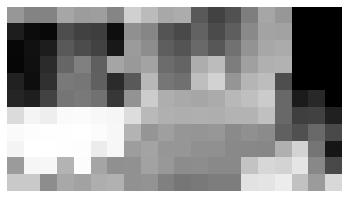

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
image = X_train[0]


some_digit_image = image.reshape(height, width)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()


In [13]:
X_train.describe()

count                                                  2112
unique                                                 2112
top       [92, 92, 86, 98, 100, 96, 60, 65, 77, 94, 85, ...
freq                                                      1
Name: images, dtype: object

In [14]:
y_train_n.describe()

count      2112
unique        2
top       False
freq       1430
Name: label, dtype: object

In [19]:
X_train_array = X_train.to_numpy()
X_train_array_exploded = np.zeros((2112,220))
for idx, x in np.ndenumerate(X_train_array):
    for idy, y in np.ndenumerate(x):
        X_train_array_exploded[idx][idy] = y
X_train_array_exploded

array([[ 92.,  92.,  86., ..., 202., 205.,  85.],
       [ 92.,  91.,  87., ..., 203., 204.,  80.],
       [ 95., 103., 108., ..., 101., 151.,  88.],
       ...,
       [105., 123., 127., ...,  92., 132.,  57.],
       [ 92.,  89.,  87., ..., 203., 205.,  78.],
       [ 77.,  79.,  80., ..., 122., 185.,  89.]])

In [20]:
y_train_n_array = y_train_n.to_numpy()
y_train_n_array

array([ True,  True, False, ..., False, False, False])

In [21]:
'''
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_n)
'''
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_array_exploded, y_train_n_array)

RandomForestRegressor(random_state=42)

In [24]:
X_test, y_test = strat_test_set["images"], strat_test_set["label"]
#some_image = X_test[0]
#some_image
#forest_reg.predict([some_image])
X_test

771     [92, 90, 85, 90, 100, 103, 50, 64, 80, 87, 84,...
1466    [104, 112, 107, 122, 102, 104, 86, 57, 74, 71,...
2063    [132, 130, 129, 132, 129, 125, 115, 77, 87, 10...
2562    [133, 131, 129, 112, 114, 115, 136, 55, 74, 87...
854     [111, 128, 129, 93, 103, 101, 125, 53, 72, 93,...
                              ...                        
476     [102, 114, 118, 105, 109, 111, 136, 49, 66, 81...
1988    [102, 114, 115, 86, 104, 104, 136, 46, 64, 78,...
2501    [133, 131, 129, 95, 102, 103, 124, 51, 68, 84,...
206     [104, 114, 116, 93, 104, 105, 128, 47, 67, 80,...
1077    [90, 89, 86, 106, 101, 102, 66, 65, 76, 89, 83...
Name: images, Length: 528, dtype: object

In [25]:
X_test_array = X_test.to_numpy()
X_test_array_exploded = np.zeros((528,220))
for idx, x in np.ndenumerate(X_test_array):
    for idy, y in np.ndenumerate(x):
        X_test_array_exploded[idx][idy] = y
X_test_array_exploded

array([[ 92.,  90.,  85., ..., 203., 202.,  84.],
       [104., 112., 107., ..., 164., 179.,  87.],
       [132., 130., 129., ..., 231., 233., 105.],
       ...,
       [133., 131., 129., ..., 122., 176.,  80.],
       [104., 114., 116., ..., 122., 157.,  90.],
       [ 90.,  89.,  86., ..., 202., 203.,  80.]])

In [27]:
some_image = X_test_array_exploded[0]
#some_image
forest_reg.predict([some_image])

array([0.9])